https://cs50.harvard.edu/python/2022/psets/7/working/

Working 9 to 5

Whereas most countries use a 24-hour clock, the United States tends to use a 12-hour clock. Accordingly, instead of “09:00 to 17:00”, many Americans would say they work “9:00 AM to 5:00 PM” (or “9 AM to 5 PM”), wherein “AM” is an abbreviation for “ante meridiem” and “PM” is an abbreviation for “post meridiem”, wherein “meridiem” means midday (i.e., noon).
Conversion Table

Just as “12:00 AM” in 12-hour format would be “00:00” in 24-hour format, so would “12:01 AM” through “12:59 AM” be “00:01” through “00:59”, respectively.

    12-Hour     12:00 AM
    24-Hour     00:00
    12-Hour     1:00 AM
    24-Hour     01:00
    12-Hour     2:00 AM
    24-Hour     02:00
    12-Hour     3:00 AM
    24-Hour     03:00
    12-Hour     4:00 AM
    24-Hour     04:00
    12-Hour     5:00 AM
    24-Hour     05:00
    12-Hour     6:00 AM
    24-Hour     06:00
    12-Hour     7:00 AM
    24-Hour     07:00
    12-Hour     8:00 AM
    24-Hour     08:00
    12-Hour     9:00 AM
    24-Hour     09:00
    12-Hour     10:00 AM
    24-Hour     10:00
    12-Hour     11:00 AM
    24-Hour     11:00
    12-Hour     12:00 PM
    24-Hour     12:00
    12-Hour     1:00 PM
    24-Hour     13:00
    12-Hour     2:00 PM
    24-Hour     14:00
    12-Hour     3:00 PM
    24-Hour     15:00
    12-Hour     4:00 PM
    24-Hour     16:00
    12-Hour     5:00 PM
    24-Hour     17:00
    12-Hour     6:00 PM
    24-Hour     18:00
    12-Hour     7:00 PM
    24-Hour     19:00
    12-Hour     8:00 PM
    24-Hour     20:00
    12-Hour     9:00 PM
    24-Hour     21:00
    12-Hour     10:00 PM
    24-Hour     22:00
    12-Hour     11:00 PM
    24-Hour     23:00
    12-Hour     12:00 AM
    24-Hour     00:00

In a file called working.py, implement a function called convert that expects a str in either of the 12-hour formats below and returns the corresponding str in 24-hour format (i.e., 9:00 to 17:00). Expect that AM and PM will be capitalized (with no periods therein) and that there will be a space before each. Assume that these times are representative of actual times, not necessarily 9:00 AM and 5:00 PM specifically.

    9:00 AM to 5:00 PM
    9 AM to 5 PM

Raise a ValueError instead if the input to convert is not in either of those formats or if either time is invalid (e.g., 12:60 AM, 13:00 PM, etc.). But do not assume that someone’s hours will start ante meridiem and end post meridiem; someone might work late and even long hours (e.g., 5:00 PM to 9:00 AM).

Structure working.py as follows, wherein you’re welcome to modify main and/or implement other functions as you see fit, but you may not import any other libraries. You’re welcome, but not required, to use re and/or sys.

In [ ]:
import re
import sys


def main():
    print(convert(input("Hours: ")))


def convert(s):
    ...


...


if __name__ == "__main__":
    main()


Either before or after you implement convert in working.py, additionally implement, in a file called test_working.py, three or more functions that collectively test your implementation of convert thoroughly, each of whose names should begin with test_ so that you can execute your tests with:

In [ ]:
pytest test_working.py

# Hints

- Recall that the re module comes with quite a few functions, per docs.python.org/3/library/re.html, including search.
- Recall that regular expressions support quite a few special characters, per docs.python.org/3/library/re.html#regular-expression-syntax.
- Because backslashes in regular expressions could be mistaken for escape sequences (like \n), best to use Python’s raw string notation for regular expression patterns, else pytest will warn with DeprecationWarning: invalid escape sequence. Just as format strings are prefixed with f, so are raw strings prefixed with r. For instance, instead of "harvard\.edu", use r"harvard\.edu".
- Note that re.search, if passed a pattern with “capturing groups” (i.e., parentheses), returns a “match object,” per docs.python.org/3/library/re.html#match-objects, wherein matches are 1-indexed, which you can access individually with group, per docs.python.org/3/library/re.html#re.Match.group, or collectively with groups, per docs.python.org/3/library/re.html#re.Match.groups.
Note that you can format an int with leading zeroes with code like

    print(f"{n:02}")

    wherein, if n is a single digit, it will be prefixed with one 0, per docs.python.org/3/library/string.html#format-string-syntax.


# Solution

In [184]:
tests = [
    '9 AM to 5 PM', 
    '9:00 AM to 5:00 PM', 
    '9 AM to 5:30 PM'
    '10 PM to 8 AM', 
    '10:30 PM to 8:50 AM',
    '9:60 AM to 5:60 PM',
    '9 AM - 5 PM',
    '09:00 AM - 17:00 PM',
    '0 AM - 17:00 PM',
    '12 AM to 12 PM'
]

### Testing regex

In [182]:
import re
import sys


def main():
    # print(convert(input("Hours: ")))
    [print(convert(test)) for test in tests]


def convert(s):
    return re.findall(r"^(\d{1,2}):?(\d{0,2})\s(AM|PM)\sto\s(\d{1,2}):?(\d{0,2})\s(AM|PM)", s)



if __name__ == "__main__":
    main()


[('10', '', 'PM', '8', '', 'AM')]


### Testing inputs

In [190]:
import re
import sys


def main():
    
    # print(convert(input("Hours: ")))
    [print(convert(test)) for test in tests]


def convert(s):
    try:
        if matches := re.search(r"^(\d{1,2}):?(\d{0,2})\s(AM|PM)\sto\s(\d{1,2}):?(\d{0,2})\s(AM|PM)", s):
            h1, m1, p1, h2, m2, p2 = matches.groups()
            m1, m2 = map(lambda x: "0" if x == "" else x, [m1, m2])
            h1, m1, h2, m2 = map(int, [h1, m1, h2, m2])

            # Checking if the hours and minutes are out of the right ranges i.e. hours more than 12 and minutes >= 60
            if (0 <= h1 > 12) or (0 <= h2 > 12) or (0 <= m1 >= 60) or (0 <= m2 >= 60):
                raise ValueError
            
            # Ajusting hours accordingly to the period
            h1 = transform_hours(h1, p1)
            h2 = transform_hours(h2, p2)


            return f"{h1:02}:{m1:02} to {h2:02}:{m2:02}"
        
        # Uncomment the raise's bellow, also comment the "pass" line to simulate the real behavior
        # I made this way so the code won't stop
        
        # else:
        #     raise ValueError

    except (ValueError):
    #     raise
        pass


def transform_hours(h, p):
    # Checks conditions to add 12 to the number
    if ((p == "PM") and (h != 12)) or ((p == "AM") and (h == 12)):
        # Using module operator to force the answer to be at maximum 23
        return (h+ 12)%24
    else:
        return h


if __name__ == "__main__":
    main()


09:00 to 17:00
09:00 to 17:00
09:00 to 17:30
22:30 to 08:50
None
None
None
None
00:00 to 12:00


# Final Submission


In [ ]:
import re


def main():
    print(convert(input("Hours: ")))


def convert(s):
    try:
        if matches := re.search(r"^(\d{1,2}):?(\d{0,2})\s(AM|PM)\sto\s(\d{1,2}):?(\d{0,2})\s(AM|PM)", s):
            h1, m1, p1, h2, m2, p2 = matches.groups()
            m1, m2 = map(lambda x: "0" if x == "" else x, [m1, m2])
            h1, m1, h2, m2 = map(int, [h1, m1, h2, m2])

            # Checking if the hours and minutes are out of the right ranges i.e. hours more than 12 and minutes >= 60
            if (0 <= h1 > 12) or (0 <= h2 > 12) or (0 <= m1 >= 60) or (0 <= m2 >= 60):
                raise ValueError

            # Ajusting hours accordingly to the period
            h1 = transform_hours(h1, p1)
            h2 = transform_hours(h2, p2)


            return f"{h1:02}:{m1:02} to {h2:02}:{m2:02}"

        else:
            raise ValueError

    except (ValueError):
        raise


def transform_hours(h, p):
    # Checks conditions to add 12 to the number
    if ((p == "PM") and (h != 12)) or ((p == "AM") and (h == 12)):
        # Using module operator to force the answer to be at maximum 23
        return (h+ 12)%24
    else:
        return h


if __name__ == "__main__":
    main()


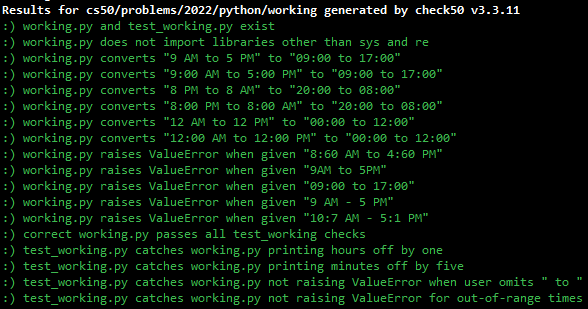

# How to Test

### How to Test working.py

Here’s how to test working.py manually:

    Run your program with python working.py. Ensure your program prompts you for a time. Type 9 AM to 5 PM, followed by Enter. Your program should output 09:00 to 17:00.
    Run your program with python working.py. Type 9:00 AM to 5:00 PM, followed by Enter. Your program should again output 09:00 to 17:00.
    Run your program with python working.py. Ensure your program prompts you for a time. Type 10 PM to 8 AM, followed by Enter. Your program should output 22:00 to 08:00.
    Run your program with python working.py. Ensure your program prompts you for a time. Type 10:30 PM to 8:50 AM, followed by Enter. Your program should again output 22:30 to 08:50.
    Run your program with python working.py. Ensure your program prompts you for a time. Try intentionally inducing a ValueError by typing 9:60 AM to 5:60 PM, followed by Enter. Your program should indeed raise a ValueError.
    Run your program with python working.py. Ensure your program prompts you for a time. Try intentionally inducing a ValueError by typing 9 AM - 5 PM, followed by Enter. Your program should indeed raise a ValueError.
    Run your program with python working.py. Ensure your program prompts you for a time. Try intentionally inducing a ValueError by typing 09:00 AM - 17:00 PM, followed by Enter. Your program should indeed raise a ValueError.

### How to Test test_working.py

To test your tests, run pytest test_working.py. Try to use correct and incorrect versions of working.py to determine how well your tests spot errors:

    Ensure you have a correct version of working.py. Run your tests by executing pytest test_working.py. pytest should show that all of your tests have passed.
    Modify the correct version of working.py, particularly its function convert. Your program might, for example, fail to raise a ValueError when it should. Run your tests by executing pytest test_working.py. pytest should show that at least one of your tests has failed.
    Similarly, modify the correct version of working.py, changing the return values of convert. Your program might, for example, mistakenly omit minutes. Run your tests by executing pytest test_working.py. pytest should show that at least one of your tests has failed.
